In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_validate
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
plt.rcParams['figure.figsize'] = [12, 8]

In [6]:
def plot_graph(y_test, y_pred, title):
    plt.plot(y_test, label='y_true')
    plt.plot(y_pred, label='y_pred')
    plt.legend()
    plt.title(title)
    plt.ylabel("Gold Week Price")
    plt.show()

In [10]:
gold = pd.read_csv('ouro2.csv')
gold = gold[::-1]
gold.head()

,Data,Valor
1095,18/06/2000,282.7
1094,25/06/2000,290.1
1093,02/07/2000,283.2
1092,09/07/2000,281.1
1091,16/07/2000,280.1


In [11]:
gold.columns = ['data', 'today_price']
gold['data']= pd.to_datetime(gold.data)
gold.head()

,data,today_price
1095,2000-06-18,282.7
1094,2000-06-25,290.1
1093,2000-02-07,283.2
1092,2000-09-07,281.1
1091,2000-07-16,280.1


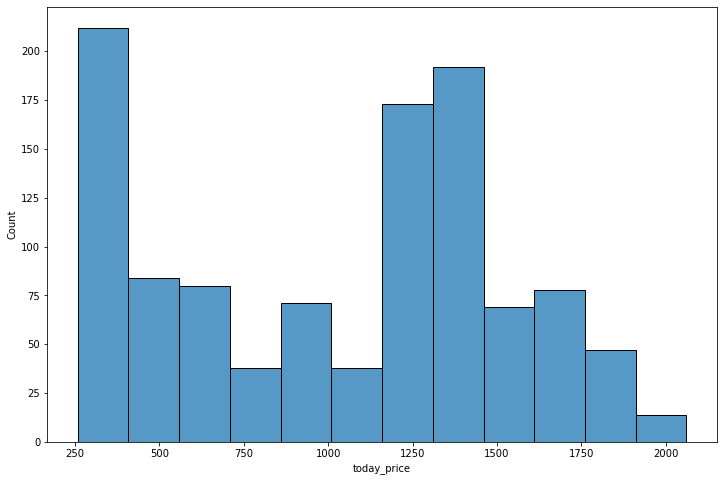

In [12]:
sns.histplot(gold.today_price)

### Normal series

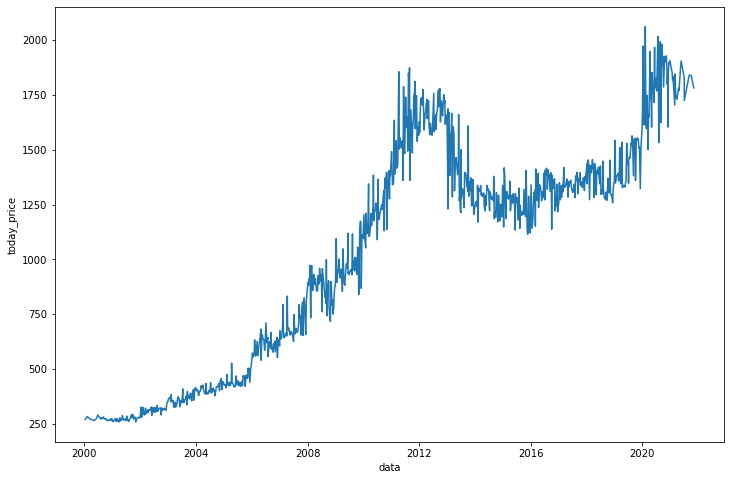

In [13]:
sns.lineplot(x=gold.data,y=gold.today_price)
# sns.lineplot(x=gold.data,y=gold.m7)
# sns.lineplot(x=gold.data,y=gold.m9)

In [18]:
# gold['last_week_price'] = gold.today_price.shift(1)
# filtro = np.where(gold['today_price'] > gold['last_week_price'], 1, 0)
# gold['target_subida'] = filtro
# gold['next_week_price'] = gold.today_price.shift(-1)
# gold['delta'] = gold.today_price - gold.last_week_price
# gold['m3'] = gold.today_price.rolling(window=3).mean()
# gold['m5'] = gold.today_price.rolling(window=5).mean()
# gold['m7'] = gold.today_price.rolling(window=7).mean()
# gold['m9'] = gold.today_price.rolling(window=9).mean()
# gold.dropna(inplace=True)

gold['last_week_price'] = gold.today_price.shift(1)
filtro = np.where(gold['today_price'] > gold['last_week_price'], 1, 0)
gold['target_subida'] = filtro
gold['next_week_price'] = gold.today_price.shift(-1)
gold['delta'] = gold.today_price - gold.last_week_price
gold['m3'] = gold.today_price.rolling(window=3).mean()
gold['m5'] = gold.today_price.rolling(window=5).mean()
gold['m7'] = gold.today_price.rolling(window=7).mean()
gold['m9'] = gold.today_price.rolling(window=9).mean()
gold.dropna(inplace=True)
gold.head()

,data,today_price,last_week_price,target_subida,next_week_price,delta,m3,m5,m7,m9
1071,2000-03-12,272.2,268.7,1,270.4,3.5,269.066667,267.48,266.628571,267.777778
1070,2000-10-12,270.4,272.2,0,273.7,-1.8,270.433333,268.66,267.485714,267.555556
1069,2000-12-17,273.7,270.4,1,272.0,3.3,272.100000,270.26,268.785714,267.833333
1068,2000-12-24,272.0,273.7,0,268.0,-1.7,272.033333,271.40,269.857143,268.677778
1067,2000-12-31,268.0,272.0,0,263.9,-4.0,271.233333,271.26,270.185714,269.055556


In [19]:
gold.tail()

,data,today_price,last_week_price,target_subida,next_week_price,delta,m3,m5,m7,m9
7,2021-04-25,1769.8,1779.9,0,1833.5,-10.1,1777.300000,1761.80,1755.900000,1746.600000
6,2021-02-05,1833.5,1769.8,1,1840.0,63.7,1794.400000,1782.44,1768.428571,1761.011111
5,2021-09-05,1840.0,1833.5,1,1878.9,6.5,1814.433333,1801.08,1783.214286,1773.866667
4,2021-05-16,1878.9,1840.0,1,1905.3,38.9,1850.800000,1820.42,1804.442857,1788.655556
3,2021-05-23,1905.3,1878.9,1,1892.0,26.4,1874.733333,1845.50,1827.085714,1807.411111


# Primeiros Experimentos:

Treinamento utilizando como conjunto de treino os preços atuais (today_price)
e target (next_week_price)


**entra preço -> prediz preço**

In [41]:
X_test_numpy = gold['today_price'].tail(100).to_numpy()
y_test_numpy = gold['next_week_price'].tail(100).to_numpy()
print("Número de linhas: {}\nNúmero de colunas: {}".format(X_test_numpy.shape, y_test.shape))

Número de linhas: (100,)
Número de colunas: (100,)


In [42]:
X_train_numpy = gold['today_price'].head(-100).to_numpy()
y_train_numpy = gold['next_week_price'].head(-100).to_numpy()
print("Número de linhas: {}\nNúmero de colunas: {}".format(X_train_numpy.shape, y_train.shape))

Número de linhas: (969,)
Número de colunas: (969,)


In [43]:
X_train_numpy = X_train_numpy.reshape(-1, 1)
X_test_numpy = X_test_numpy.reshape(-1, 1)

### Regressão Linear


RMSE  1926.0409097684885


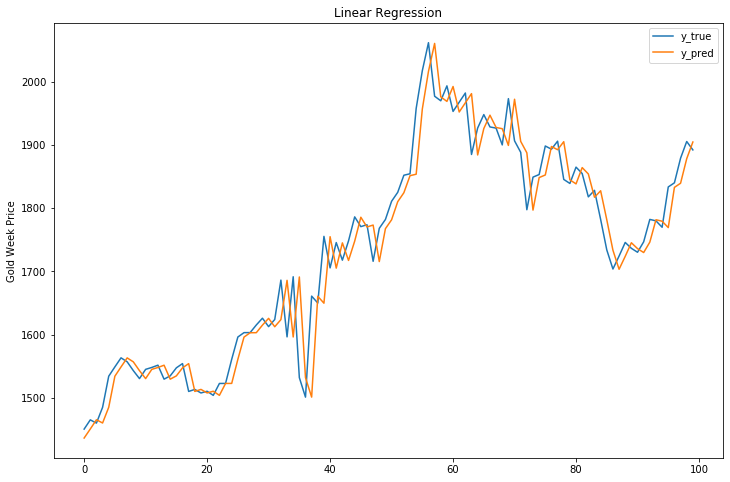

In [46]:
linear = LinearRegression().fit(X_train_numpy, y_train_numpy)
y_pred = linear.predict(X_test_numpy)
rmse = mean_squared_error(y_test_numpy, y_pred, squared=True)
print("RMSE ", rmse)
plot_graph(y_test_numpy, y_pred, "Linear Regression")

### Lasso

RMSE  1926.0409346548079


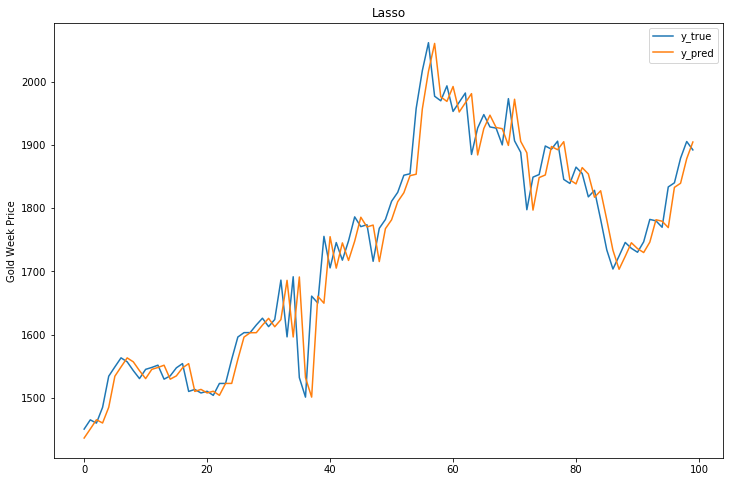

In [47]:
ridge = Ridge().fit(X_train_numpy, y_train_numpy)
y_pred = ridge.predict(X_test_numpy)
rmse = mean_squared_error(y_test, y_pred, squared=True)
print("RMSE ", rmse)
plot_graph(y_test_numpy, y_pred, "Lasso")

### Random Forest

RMSE  6385.471701055679


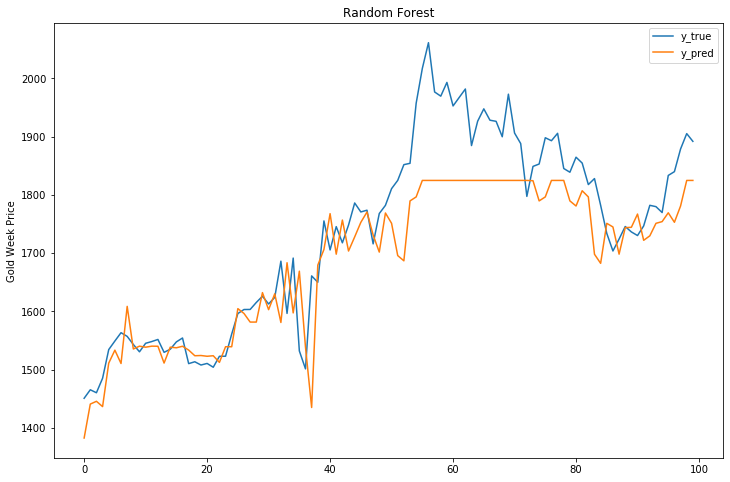

In [48]:
rf = RandomForestRegressor().fit(X_train_numpy, y_train_numpy)
y_pred = rf.predict(X_test_numpy)
rmse = mean_squared_error(y_test, y_pred, squared=True)
print("RMSE ", rmse)
plot_graph(y_test_numpy, y_pred, "Random Forest")

# Segunda leva de Experimentos:

Agora utilizaremos outros valores como médias móveis e delta de uma semana pra outras

**entra preço -> prediz preço**